In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\carloma5\OneDrive - Cisco\Desktop\Work\Tac_analysis_ST\Processing\data.csv')

# Comparing of non-numeric variables with heatmaps to understand relations and distributions between key columns

## Severity representation

In [4]:
values = df.groupby('SEVERITY').size().reset_index().rename(columns={0:'COUNT'})
values['PERCENT'] = values['COUNT']/values['COUNT'].sum()*100
values.sort_values('PERCENT', ascending=False).reset_index(drop=True)

,SEVERITY,COUNT,PERCENT
0,3,146126,92.291465
1,4,9742,6.152933
2,2,1874,1.183596
3,1,589,0.372005


## Complexity representation

In [5]:
values = df.groupby('COMPLEXITY').size().reset_index().rename(columns={0:'COUNT'})
values['PERCENT'] = values['COUNT']/values['COUNT'].sum()*100
values.sort_values('PERCENT', ascending=False).reset_index(drop=True)


,COMPLEXITY,COUNT,PERCENT
0,1 Level -Basic,99964,63.816449
1,0 Level -Procedural,29037,18.537056
2,2 Level -Advanced,25140,16.049233
3,3 Level -Exceptionally Complex,2502,1.597263


## Severity x Complexity

COMPLEXITY,0 Level -Procedural,1 Level -Basic,2 Level -Advanced,3 Level -Exceptionally Complex
SEVERITY,,,,
1,0.101868,0.567063,0.275042,0.056027
2,0.072688,0.555318,0.327632,0.044361
3,0.166236,0.653397,0.164374,0.015992
4,0.495892,0.432430,0.063873,0.007804


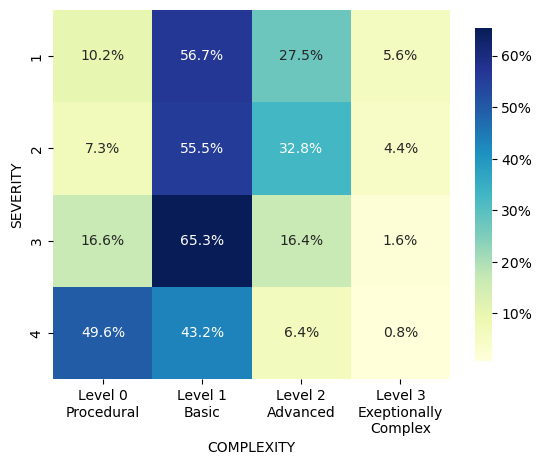

In [6]:
pivot = pd.pivot_table(df[['SEVERITY', 'COMPLEXITY']], index=['SEVERITY'],columns=['COMPLEXITY'], aggfunc='size')
pivot = pivot.div(pivot.sum(axis=1), axis=0)
ax = sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={"shrink": 0.9})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
locs, labels = plt.xticks()
plt.xticks(locs, ['Level 0\nProcedural', 'Level 1\nBasic', 'Level 2\nAdvanced', 'Level 3\nExeptionally\nComplex'], rotation=0)
pivot

## Problem code x Resolution code

RESOLUTION_CODE,OTHER,CUST EDU,SW CONFIG,RMA,DOC PROVIDED
PROBLEM_CODE,,,,,
CONFIG_ASSISTANCE,0.216809,0.340179,0.259584,0.031779,0.151648
DATA_CORRUPTION,0.330275,0.183486,0.403670,0.000000,0.082569
ERROR_MESSAGES,0.219068,0.297651,0.265847,0.104992,0.112442
HARDWARE_DOA,0.175141,0.045198,0.005650,0.768362,0.005650
HARDWARE_FAILURE,0.112920,0.098182,0.017124,0.736566,0.035207
Health_and_Config_Check,0.187500,0.500000,0.104167,0.020833,0.187500
INSTLL_UNSTLL_UPGRD,0.246449,0.294041,0.264082,0.018776,0.176653
INTEROP,0.245332,0.277513,0.336114,0.028605,0.112435
LICENSING,0.814675,0.100659,0.050172,0.002509,0.031985


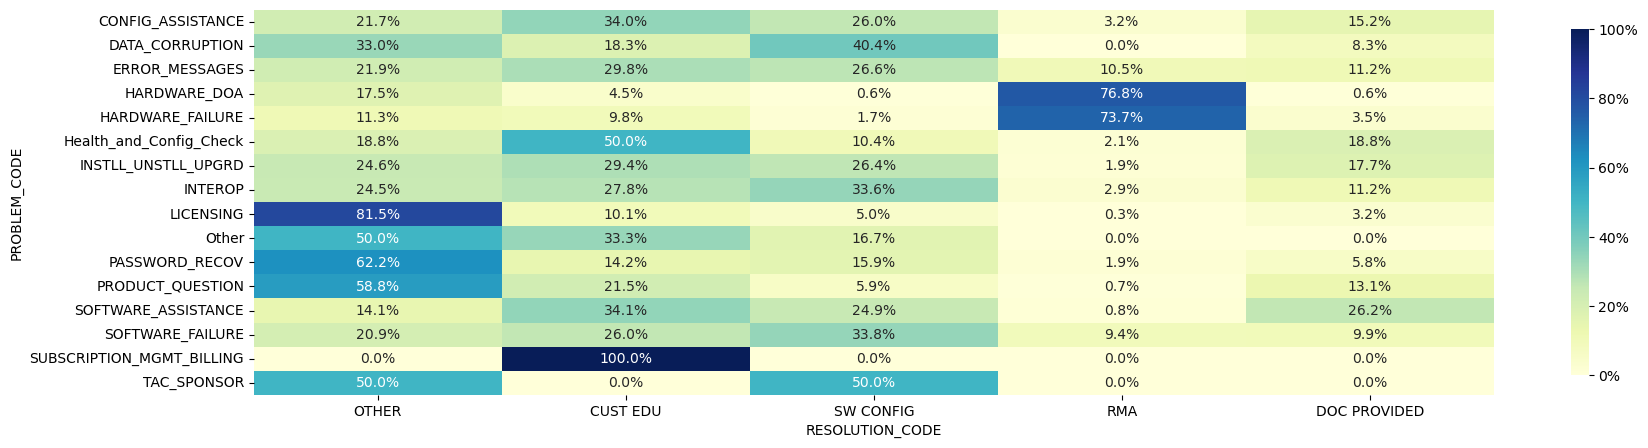

In [7]:
df = df.loc[df['RESOLUTION_CODE'] != '3RD PARTY']

## Problem code x Resolution code
pivot = pd.pivot_table(df[['PROBLEM_CODE', 'RESOLUTION_CODE']], index=['PROBLEM_CODE'],columns=['RESOLUTION_CODE'], aggfunc='size')
fig, ax = plt.subplots(figsize=(20, 5))
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)
sum_col = pivot.sum(axis=0)
pivot = pivot[sum_col.sort_values(ascending=False).index[:]]
sns.heatmap(pivot, cmap='YlGnBu', xticklabels=True, yticklabels=True, ax=ax, annot=True, fmt=".1%", cbar_kws={"shrink": 0.9})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
pivot

## Request type x Resolution code

RESOLUTION_CODE,RMA,CUST EDU,OTHER,SW CONFIG,DOC PROVIDED
REQUEST_TYPE,,,,,
Answer my Question,0.009242,0.396454,0.180498,0.152207,0.261599
Diagnose and Fix my Problem,0.194748,0.268239,0.204954,0.220259,0.111800
Replace my Product,0.873717,0.034473,0.071636,0.010901,0.009273


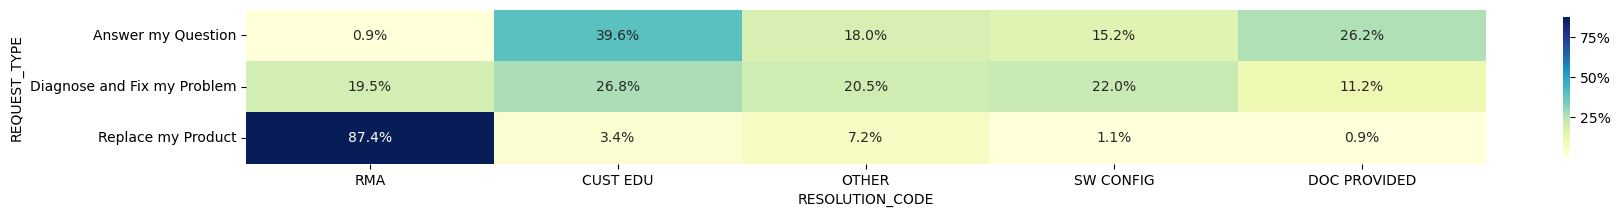

In [8]:
pivot = pd.pivot_table(df[['REQUEST_TYPE', 'RESOLUTION_CODE']], index=['REQUEST_TYPE'],columns=['RESOLUTION_CODE'], aggfunc='size')
fig, ax = plt.subplots(figsize=(20, 2))
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)
sum_col = pivot.sum(axis=0)
pivot = pivot[sum_col.sort_values(ascending=False).index[:]]
sns.heatmap(pivot, cmap='YlGnBu', fmt=".1%", xticklabels=True, yticklabels=True, ax=ax,annot=True, cbar_kws={"shrink": 0.9})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
pivot

## Architecture x Resolution code

RESOLUTION_CODE,RMA,CUST EDU,OTHER,SW CONFIG,DOC PROVIDED
ARCH_GROUPING,,,,,
Campus,0.189669,0.231475,0.234386,0.248569,0.095902
Datacenter Switching,0.080349,0.348959,0.234449,0.194996,0.141247
Datacenter_Computing,0.386901,0.241205,0.165528,0.094338,0.112027
IOT,0.611494,0.119540,0.126437,0.080460,0.062069


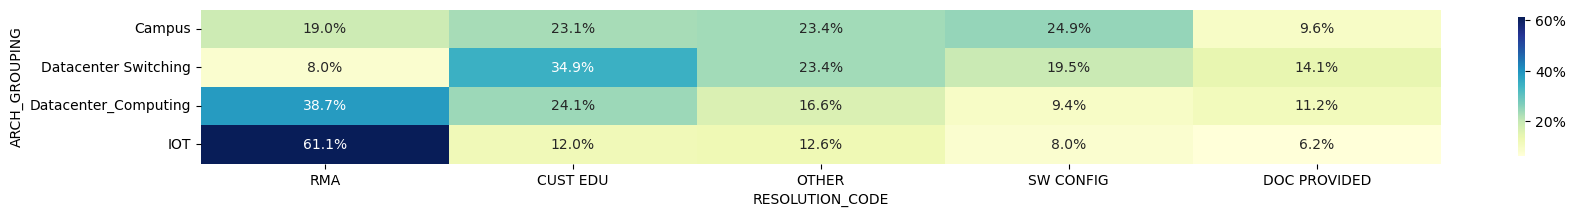

In [9]:
pivot = pd.pivot_table(df[['ARCH_GROUPING', 'RESOLUTION_CODE']], index=['ARCH_GROUPING'],columns=['RESOLUTION_CODE'], aggfunc='size')
fig, ax = plt.subplots(figsize=(20, 2))
pivot = pivot.div(pivot.sum(axis=1), axis=0).fillna(0)
sum_col = pivot.sum(axis=0)
pivot = pivot[sum_col.sort_values(ascending=False).index[:]]
sns.heatmap(pivot, cmap='YlGnBu', fmt=".1%", xticklabels=True, yticklabels=True, ax=ax, annot=True, cbar_kws={"shrink": 0.9})
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
pivot

# Comparing of numeric variables with violin and boxplots to show the distribution with the days it took to close the case.

## Severity

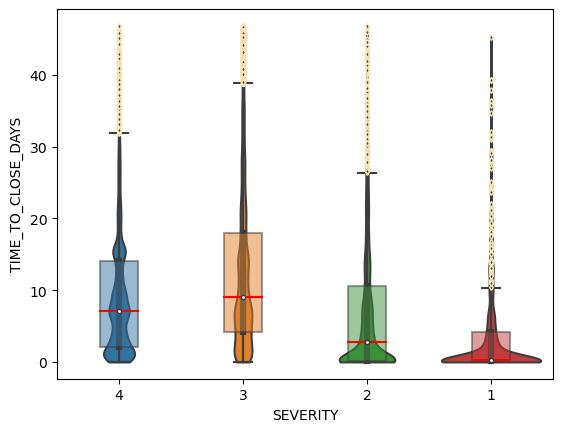

In [10]:
ax = sns.violinplot(data=df, x='SEVERITY', y='TIME_TO_CLOSE_DAYS', cut = 0, gridsize=1000, bw=0.1, order=[4,3,2,1])
sns.boxplot(df, x='SEVERITY', y='TIME_TO_CLOSE_DAYS', showfliers=True,
            width=0.3, boxprops={'zorder': 2, 'alpha': 0.5}, ax=ax, order=[4,3,2,1],  fliersize=3,
            flierprops=dict(markeredgecolor='moccasin'),
            medianprops=dict(color='r'))
plt.show()

## Complexity

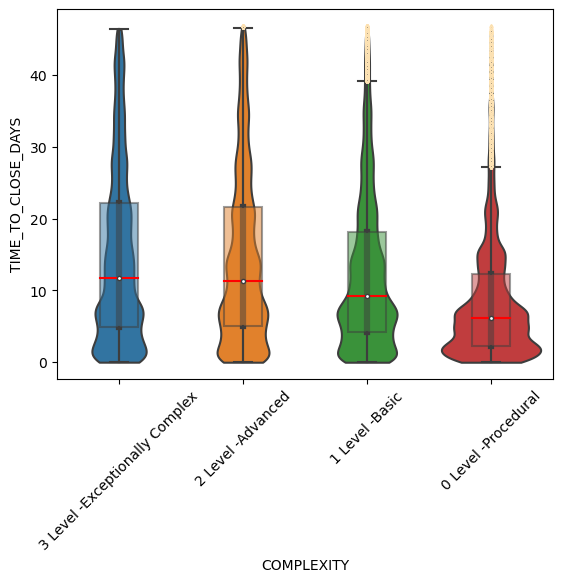

In [11]:
ax = sns.violinplot(data=df, x='COMPLEXITY', y='TIME_TO_CLOSE_DAYS', cut = 0, gridsize=1000, bw=0.1, order=['3 Level -Exceptionally Complex', '2 Level -Advanced', '1 Level -Basic', '0 Level -Procedural'])
sns.boxplot(data=df, x='COMPLEXITY', y='TIME_TO_CLOSE_DAYS', showfliers=True,
            width=0.3, boxprops={'zorder': 2, 'alpha': 0.5}, ax=ax, fliersize=2,
            order=['3 Level -Exceptionally Complex', '2 Level -Advanced', '1 Level -Basic', '0 Level -Procedural'],
            flierprops=dict(markeredgecolor='moccasin'),
            medianprops=dict(color='r'))
ax.tick_params(axis='x', rotation=45)

## Market segment

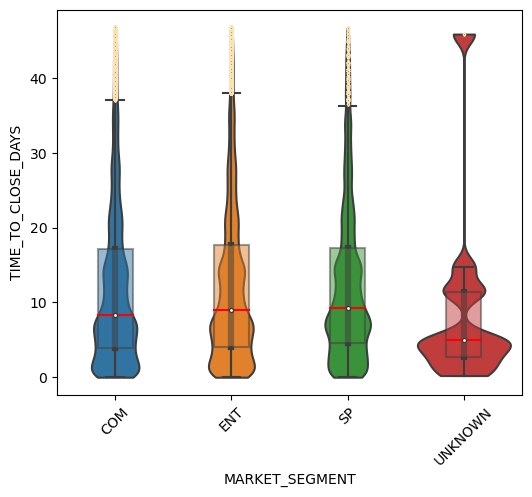

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.violinplot(data=df, x='MARKET_SEGMENT', y='TIME_TO_CLOSE_DAYS', cut = 0, gridsize=1000, bw=0.1, ax=ax)
sns.boxplot(data=df, x='MARKET_SEGMENT', y='TIME_TO_CLOSE_DAYS',
            width=0.3, boxprops={'zorder': 2, 'alpha': 0.5}, ax=ax,  fliersize=2,
            flierprops=dict(markeredgecolor='moccasin'),
            medianprops=dict(color='r'))
ax.tick_params(axis='x', rotation=45)
plt.show()

# df_temp = df[['MARKET_SEGMENT']].groupby('MARKET_SEGMENT').size().reset_index().rename(columns={0:'count'})
# index = df_temp.sort_values('count', ascending=False)['MARKET_SEGMENT']
# fig, ax = plt.subplots(figsize=(6, 5))
# ax = sns.barplot(df_temp, x='MARKET_SEGMENT', y='count', order=index)
# ax.tick_params(axis='x', rotation=45)
# plt.show()